<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 03 **
** ┗ Power Generation USing Weather Dat **
---
> ** context **

* Problem Scenario and Data Exploration
* Defining the Problem-Solving Process
* 🥉Session 1 -「Exploring Peak Power Generation Times」
* 🥈Session 2 -「Analyzing Correlation Between Power Generation and Weather Data」
* 🥇Session 3 -「Predicting Power Generation Using ML」

In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Mount Google Drive or Connect by Clicking The Folder
from google.colab import drive
drive.mount('/content/drive')

# ▶ set path
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/03_Electricity Generation Forecasting Using Weather Data')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/DA portfolio/DA_colab/03_Electricity Generation Forecasting Using Weather Data'

## ** Problem scenario and data exploration **
---
> ** scenario ** ⚡ (Product Designer, Operator, Field Data Analyst)

``
Company a Wants to Forecast Next Year's Electricity Usage Plan to Prepare an Electricity Budget.Power Generation Fluctuates Significantly Based on Weather Conditions, Making Budgeting Diffult.The Plan to Create a Model Predicting Power Generation Using One Year of Data from 2017, and to Forecast Electricity Generation and Usage Plans by Incorating Weather ForecastData.

``

** Data Exploration **

* Data from January 1, 2017, To December 30, 2017, Recorded EVERY 10 MINUTES, IncludeS Weather Data, Power Generation, and Power Consumption in Zones 1 to 3.
* Data specification ⬇

|Date|Temperature|Humidity|Wind Speed|general diffuse flows|diffuse flows|Zone 1 Power Consumption|Zone 2 Power Consumption|Zone 3 Power Consumption|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|

In [ ]:
# ▶ Data Read
import pandas as pd
df = pd.read_csv('chapter03_powercomp.csv')
df.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


## ** Defining the Problem-Solving Process **
---
> ** Problem definition **

``
▶ Difficulties in Budgeting for Power Usage
``

> ** Expected outcomes **

``
▶ Security Budget and Stable Operations by Planning Power Budgets
``

> ** SOLUTION **

``
▶ Forecasting Power Consumption and Planning Power Usage Via Predictive Models
▶ Session 1 🥉
-Time-Series Exploration and Power Generation Time Identification
▶ Session 2 🥈
-Corelation Analysis use variety plots
▶ Session 3 🥇
-DeDicting Power Generation Using ML Algorithms
``
``

> ** Performance Metrics **

``
▶ Cost Savings Through Power Budgeting Based on Predictive Modeling
``
> ** Business Application **

``
▶ Establish Real-Time Collection Systems for Weather Forecast Data
▶ Establish Real-Time Server Transmission for Generation Sensor Data
▶ Regularly Input Weather Data and Generate Power Generation Forecasts Using Models
▶ Plan Electricity Usage Based on Generated Data
``

> ** Preview of Key Code **

``
▶ Session 1 → Replace (), TO_DATETIME (), ASTYPE (STR)
▶ Session 2 → SNS.Distplot (), Plt.axvline (), Value_counts (), SNS.Heatmap (), SNS.Pairplot ()
▶ Session 3 → Unique (), dt.Hour (), plt.xticks

## ** 🥉Session 1 **
** ┗ Exploring Peak Power Generation Times **
---

### · Data Preprocessing
---
* Checking Basic Information About Collected Data:

(1) check data shape

(2) check data types

(3) check for null values

(4) check for Outliers

In [ ]:
# ▶ Check Data Shape
# ▶ Composed of 52416 rows, 9 columns
print('df', df.shape)

df (52416, 9)


In [ ]:
# ▶ check data types
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
# ▶ check for null values
print(df.isnull().sum())

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [ ]:
# ▶ Descriptive Statistics of Data to Identify Outliers
df.describe ()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
# ▶ Convert DateTime from Object to DateTime
import datetime
df['DateTime']=pd.to_datetime(df['DateTime'])

In [ ]:
# ▶ Complete
df.head (5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### · Search for power volume data
---
* Data Trend Analysis

In [ ]:
# ▶ Check DATA in 1 year of 2017
df['DateTime'].min(), df['DateTime'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

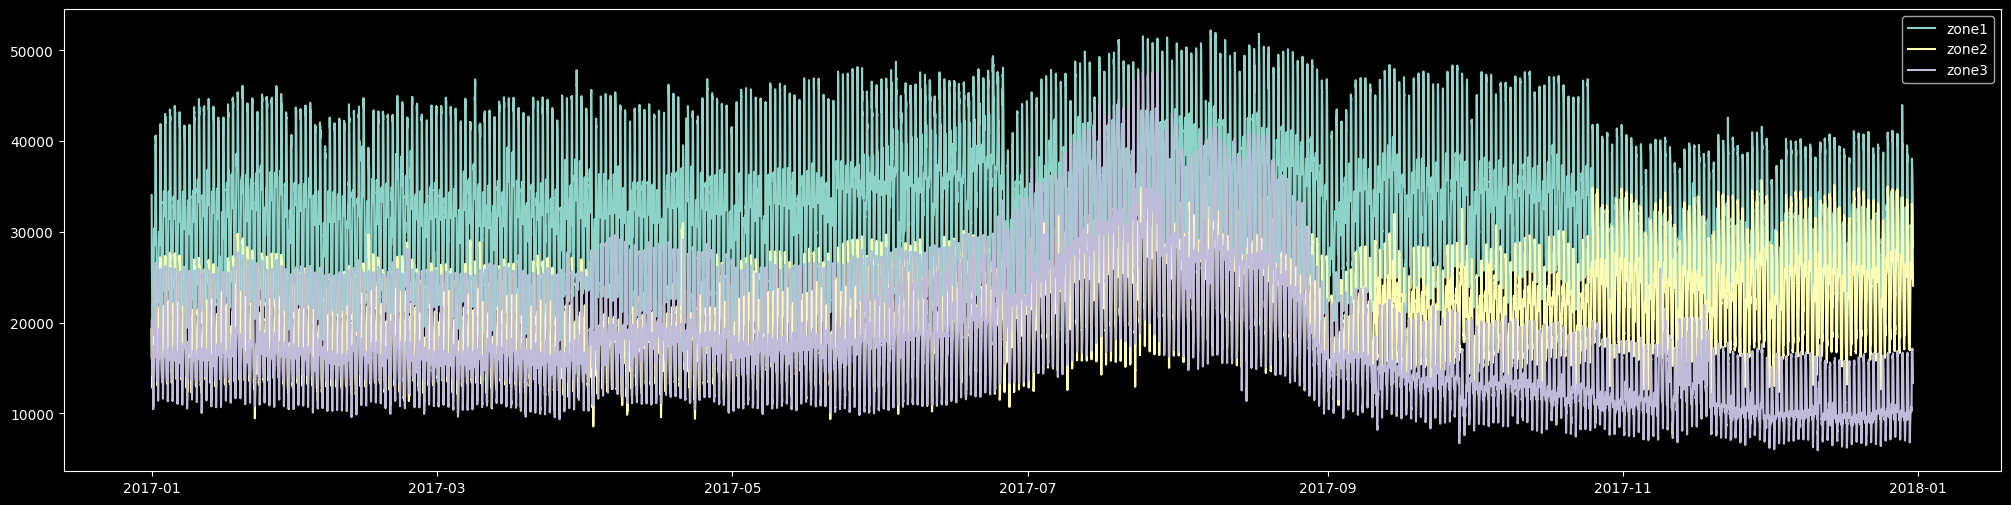

In [ ]:
# ▶ ZONE1, 2, 3 Electric Power Development
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['DateTime'], df['Zone 1 Power Consumption'], label='zone1')
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'], label='zone2')
plt.plot(df['DateTime'], df['Zone 3  Power Consumption'], label='zone3')
plt.legend()
plt.gcf().set_size_inches(25, 6)

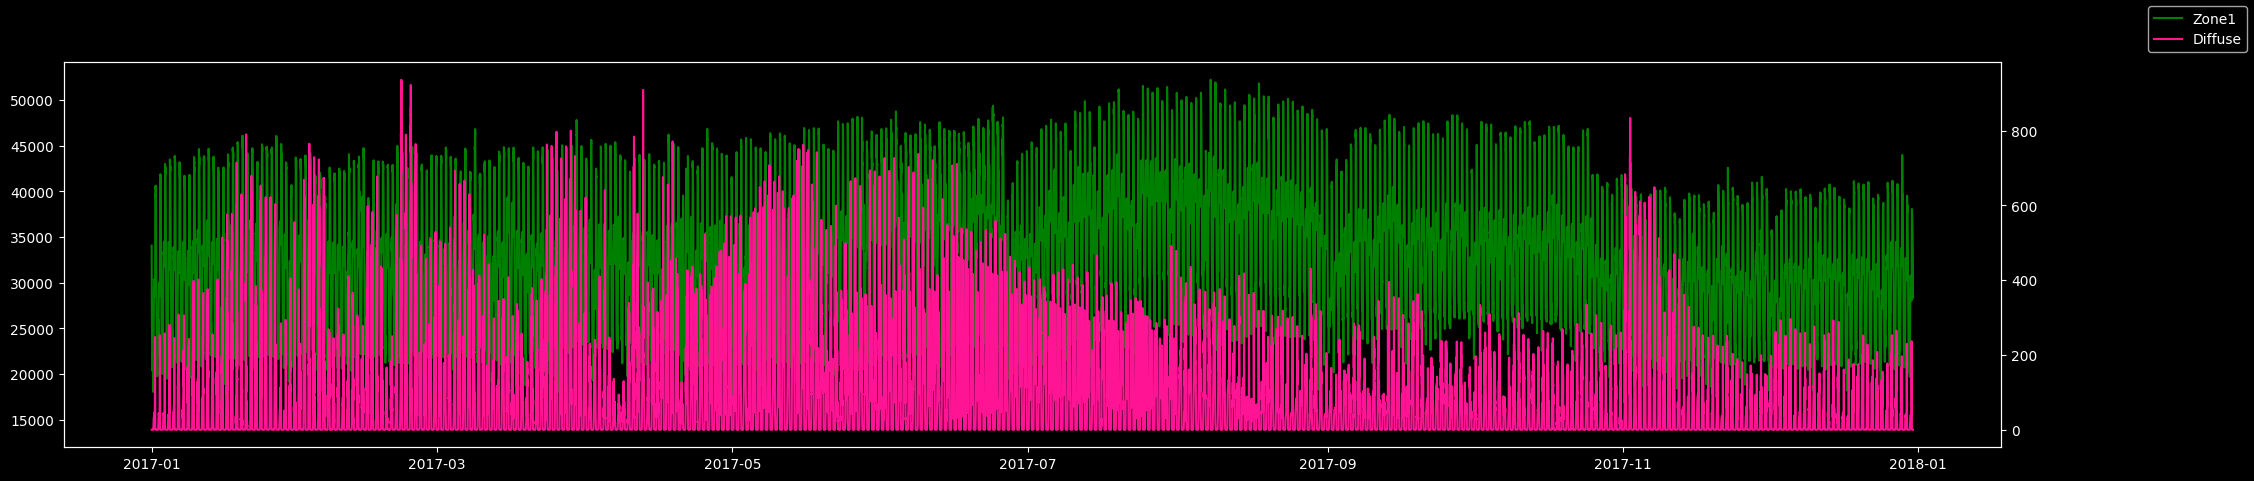

In [ ]:
# ▶ ZONE1 power generation and power flows comparison
# ▶ When the Diffuse Flows is lowered, the power generation tends to increase
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['diffuse flows'], color='deeppink', label='Diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()

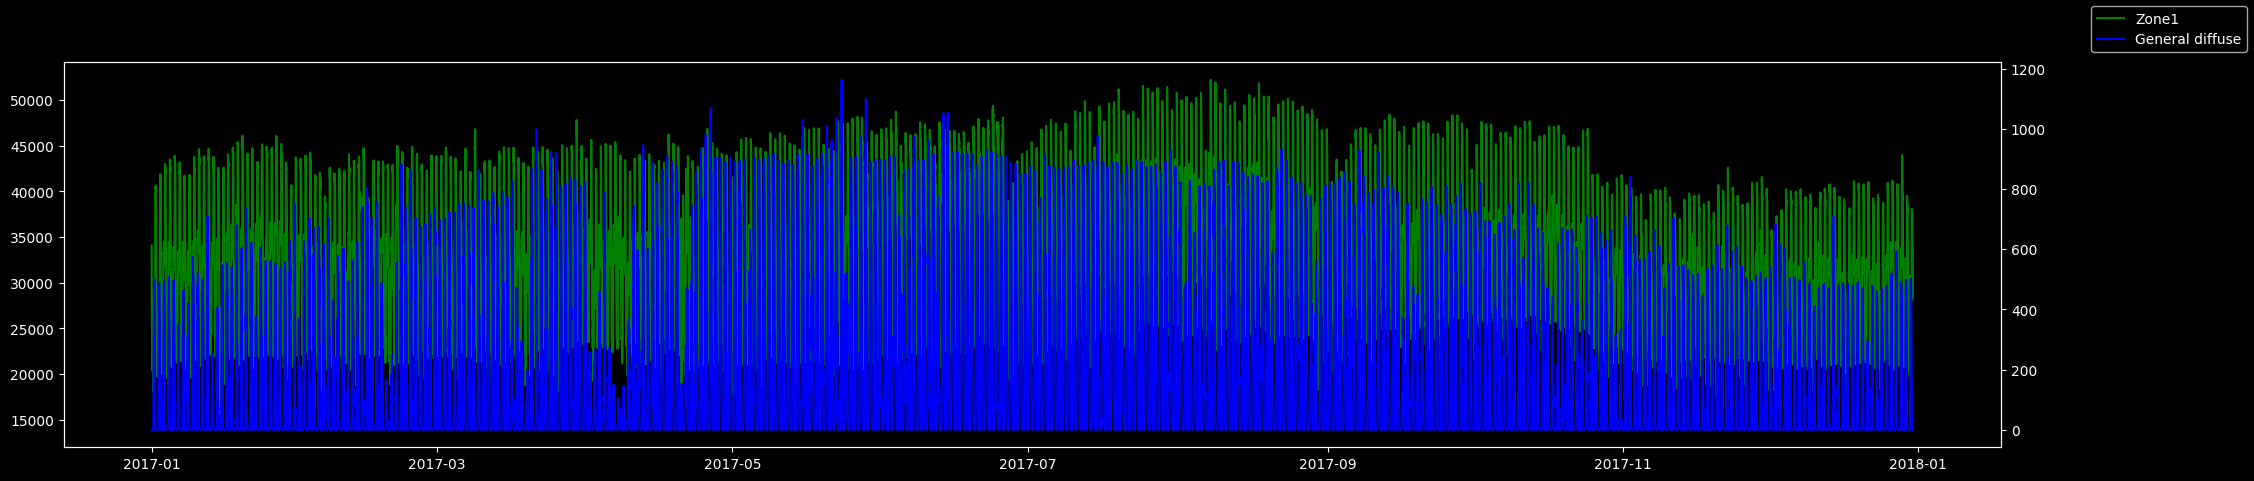

In [ ]:
# ▶ ZONE1 power generation and power divergence comparison comparison
# ▶ There seems to be no significant correlation with the general diffuse flows
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['general diffuse flows'], color='blue', label='General diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()

### · Peak time exploration
---
* Power power generation Peak of monthly search
* Power power generation Peark time exploration

In [ ]:
# ▶ Use time data MONTH production
df['month']=df['DateTime'].dt.month
df.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


In [ ]:
# ▶ COL name change
df.columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3', 'month']

# ▶ 순서변경
df=df[['DateTime',  'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3']]

In [ ]:
df.head (5)

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
# ▶ ZONE 1 is the most average power generation in August
df['zone1'].groupby(df['month']).mean().sort_values(ascending=False).head(5)

,zone1
month,
8,36435.189574
7,35831.553603
6,34605.540839
9,33396.681416
10,32827.660055


In [ ]:
# ▶ ZONE 2 is the most average power generation in August
df['zone2'].groupby(df['month']).mean().sort_values(ascending=False).head(3)

,zone2
month,
8,24656.216575
7,24147.886893
12,23681.852818


In [ ]:
# ▶ ZONE3 has the highest average power generation in July
df['zone3'].groupby(df['month']).mean().sort_values(ascending=False).head(3)

,zone3
month,
7,28194.111216
8,24648.894732
6,20430.941538


In [ ]:
# ▶ Create time data
df['hour']=df['DateTime'].dt.hour

In [ ]:
# ▶ ZONE 1 is 20H with the highest average power generation
df['zone1'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)

,zone1
hour,
20,43822.590575
19,42795.919144
21,42216.478542


In [ ]:
# ▶ ZONE 2 is 20H with the highest average power generation
df['zone2'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)

,zone2
hour,
20,28186.910385
19,27723.744582
21,27228.712785


In [ ]:
# ▶ ZONE3 has the highest average power generation in 20H
df['zone3'].groupby(df['hour']).mean().sort_values(ascending=False).head(3)

,zone3
hour,
20,26027.609150
21,25186.686692
19,25125.471392


In [ ]:
# ▶ August 1 Sample Data Plotting
df_8=df[df['DateTime'].astype(str).str.contains('2017-08-01')]

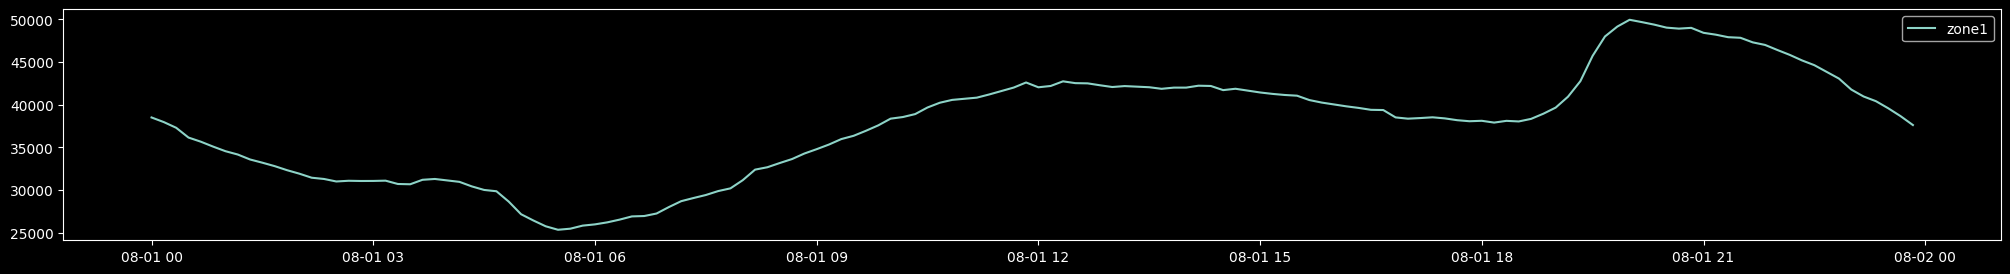

In [ ]:
# ▶ Surprisingly, there is a lot of power generation in the evening
plt.plot(df_8['DateTime'], df_8['zone1'], label='zone1')
plt.legend()
plt.gcf().set_size_inches(25, 3)

## ** 🥈Session 2 **
** ┗ Power power generation and meteorological data correlation analysis **
---

### · Line Plot -Analysis of correlation
---
* Power generation amount and weather data after plotting the relationship

In [ ]:
df.head(5)

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


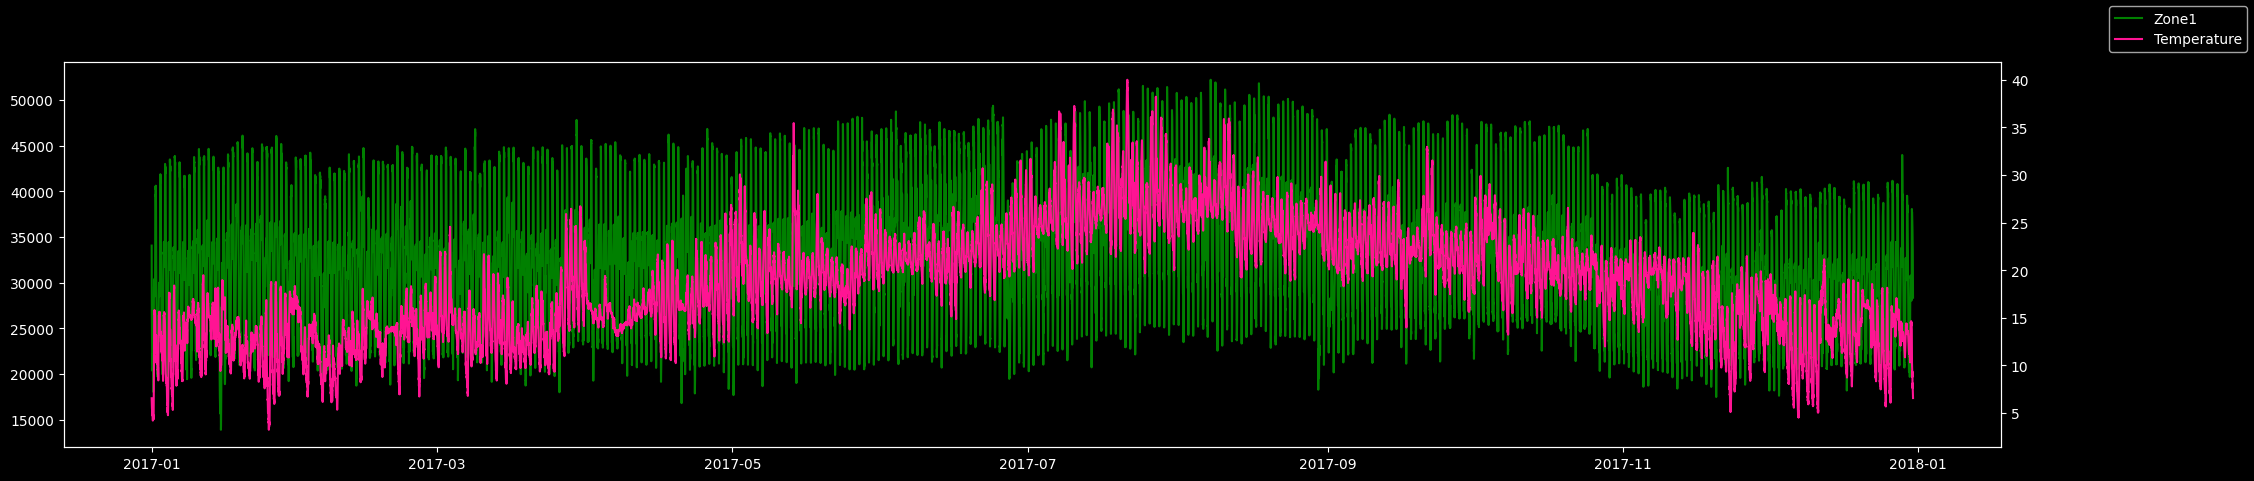

In [ ]:
# ▶ Twin Plot (double axis chart)
# ▶ As the temperature increases, power generation tends to increase
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['zone1'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['Temperature'], color='deeppink', label='Temperature')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()

### · Scatter plot - correlationship

``
|r| = absolute value of the correlation coefficient

· 0.0 <= |r| < 0.2 : No correlation = No linear relationship  
· 0.2 <= |r| < 0.4 : Weak correlation  
· 0.4 <= |r| < 0.6 : Moderate correlation  
· 0.6 <= |r| < 0.8 : Strong correlation  
· 0.8 <= |r| <= 1.0 : Very strong correlation


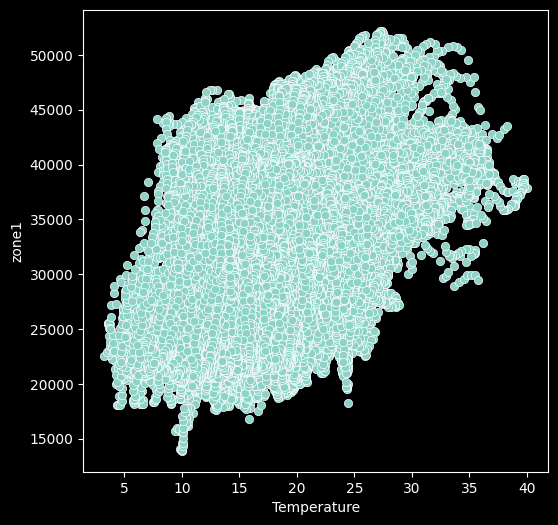

In [ ]:
# ▶ Scatter plot
# ▶ As the temperature increases, power generation tends to increase
sns.scatterplot(x=df['Temperature'], y=df['zone1']);
plt.gcf().set_size_inches(6, 6)

In [ ]:
# ▶ Check the correlation coefficient
import scipy.stats as stats
stats.pearsonr(x=df['Temperature'], y=df['zone1'])

PearsonRResult(statistic=np.float64(0.44022078902914086), pvalue=np.float64(0.0))

### · Pair Plot -Correlation Relationship Analysis
---

In [ ]:
df.columns

Index(['DateTime', 'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3',
       'hour'],
      dtype='object')

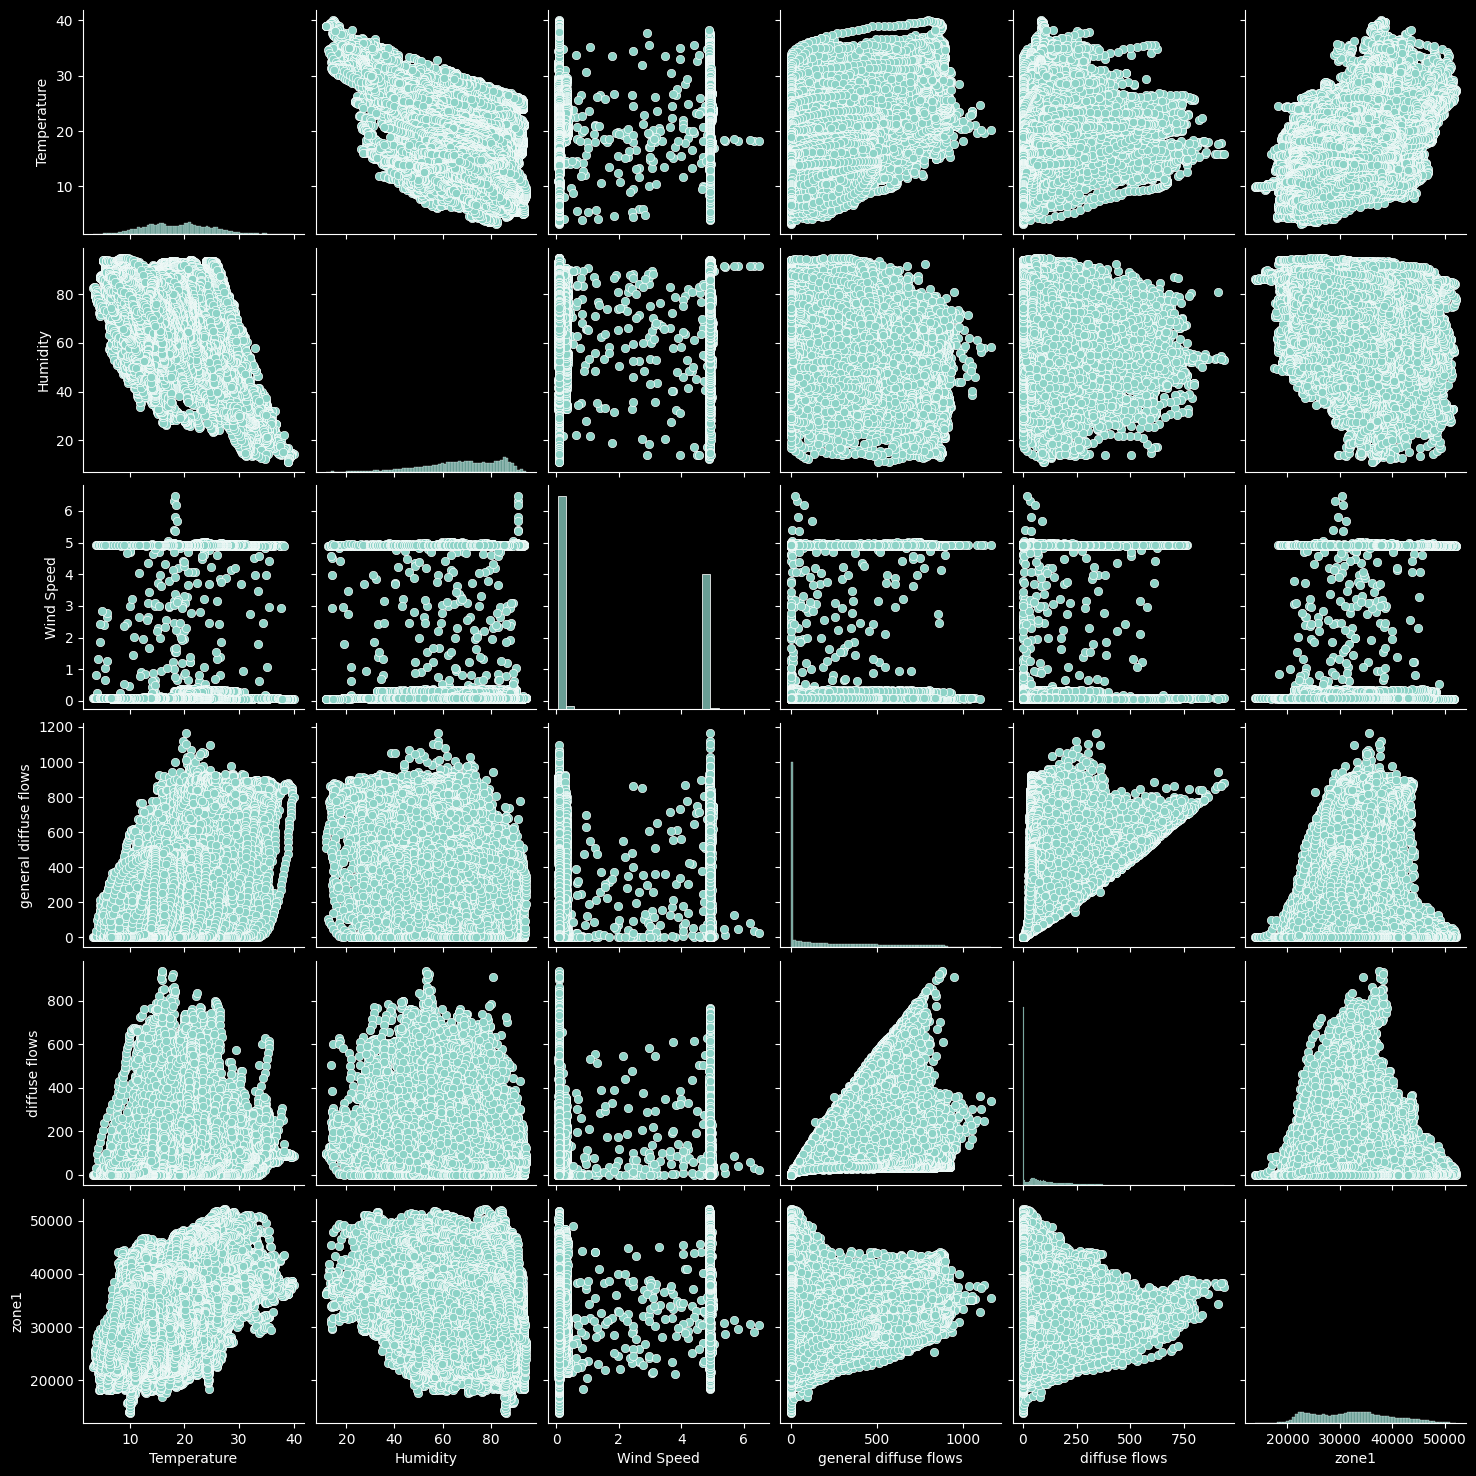

In [ ]:
# ▶ scatter plot on all variable combinations
df_pair = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'zone1']]
# plt.style.use(['dark_background'])
sns.pairplot(df_pair)
plt.show()

### · Heat Map -Correlation Analysis
---

In [ ]:
df_pair.corr ()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274
zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000


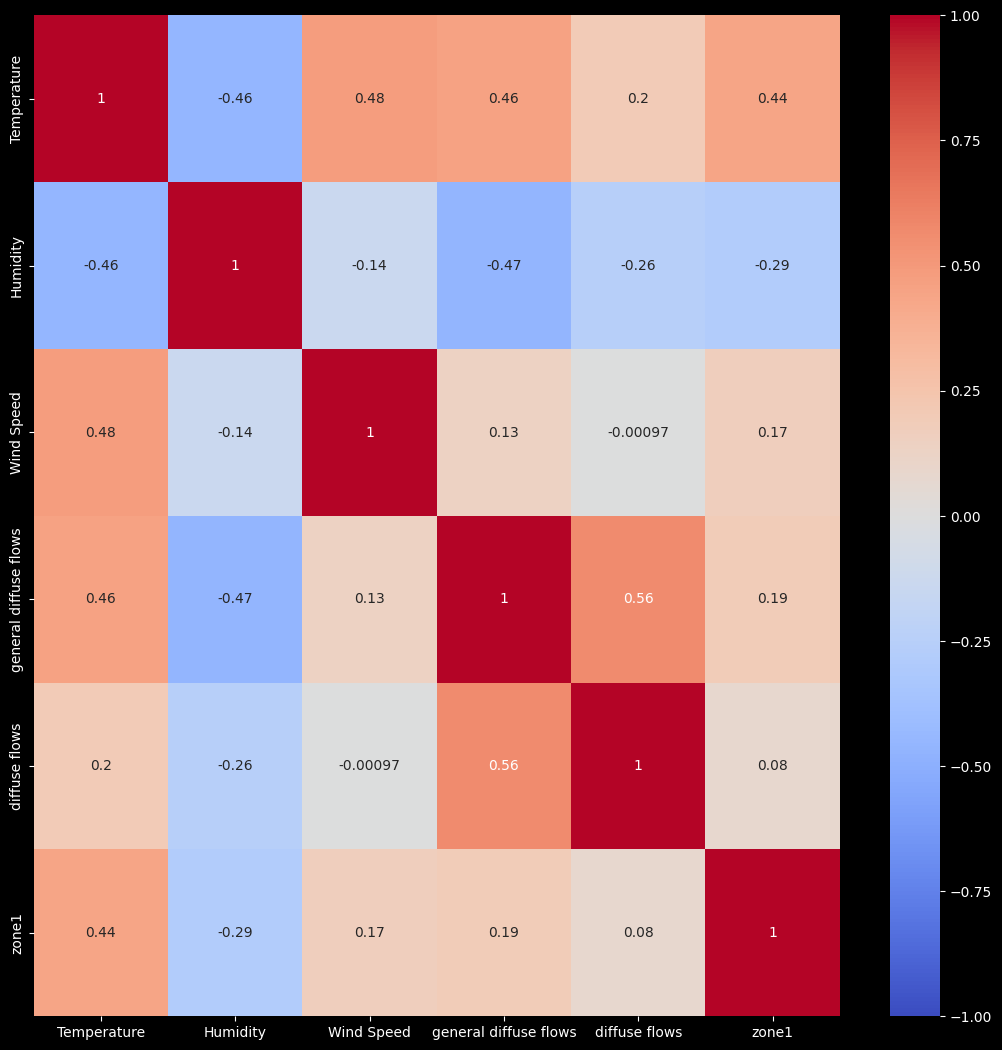

In [ ]:
# ▶ All combinations of variables, expression of correlation coefficient
plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

## ** 🥇Session 3 **
** ┗ ML utilization power generation forecast **
---

### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction

In [ ]:
df.head (5)

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


In [ ]:
# ▶ COL location change
df = df[['DateTime', 'month', 'hour', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3']]
df.head(5)

,DateTime,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,0,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['DateTime', 'zone1', 'zone2', 'zone3'], axis=1)
Y=df['zone1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(36691, 7)
(36691,)
(15725, 7)
(15725,)


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions

In [ ]:
# ▶ randomforressRRESSOR model learning
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ and decision?
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  340.4154059159981
r2_score(r2):  0.9951028756117745

mae_test(mae):  911.2703948387664
r2_score(r2):  0.9659418457595704


In [ ]:
# ▶ Expressing the actual value and prediction value
df_result = pd.DataFrame({'Real Values':y_test,
                          'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,32997.54575,33256.469821,-258.924071
1,26841.35593,26599.894339,241.461591
2,35157.61589,35233.531394,-75.915504
3,38412.75748,38034.947806,377.809674
4,33506.04255,33874.380841,-368.338291


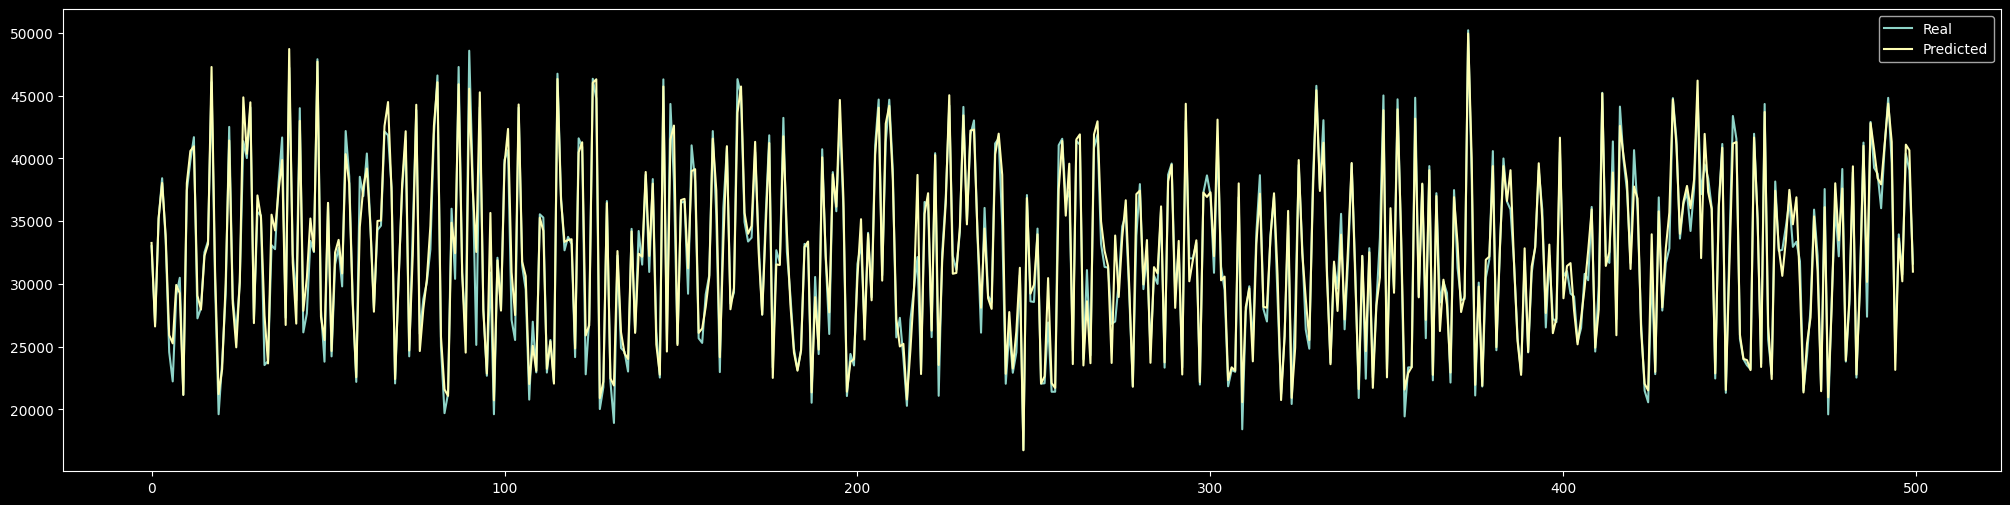

In [ ]:
# ▶ ZONE1 power generation Real and Pred value check
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df_result.index[0:500], df_result['Real Values'][0:500], label='Real')
plt.plot(df_result.index[0:500], df_result['Predicted Values'][0:500], label='Predicted')

plt.legend()
plt.gcf().set_size_inches(25, 6)

### · Identify important variables
---
* Finding important variables through feature IMP analysis

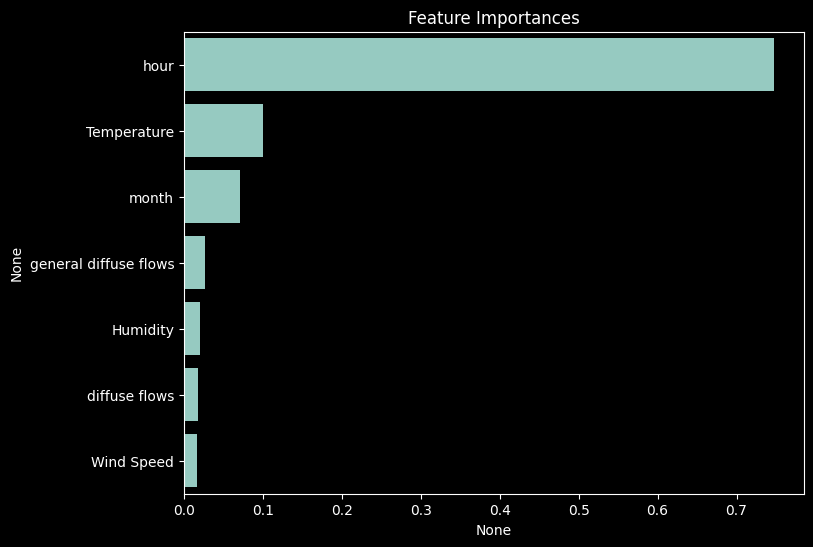

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

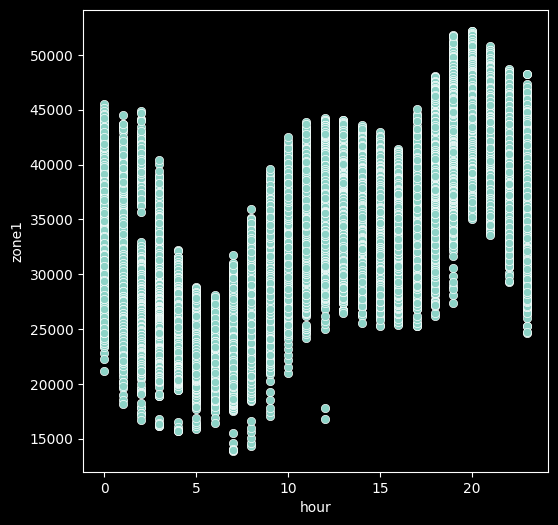

In [ ]:
# ▶ Plotting the relationship with power generation for data with the highest feature IMP
plt.style.use(['dark_background'])
sns.scatterplot(x=df['hour'], y=df['zone1']);
plt.gcf().set_size_inches(6, 6)

### · Model Save and Read
---
* Save and load the final model

In [ ]:
import pickle
#Save model
saved_model = pickle.dumps(rfr)

In [ ]:
#Model Read
rfr_from_pickle = pickle.loads(saved_model)